In [32]:
import numpy as np
import pandas as pd

def dematel_mcdm(pairwise_matrix):
    row_sums = np.sum(pairwise_matrix, axis=1)
    col_sums = np.sum(pairwise_matrix, axis=0)

    max_row_sum = np.max(row_sums)
    max_col_sum = np.max(col_sums)

    max_value = np.maximum(max_row_sum, max_col_sum)
    normalized_matrix = pairwise_matrix / max_value


    unit_matrix = np.eye(pairwise_matrix.shape[0])

    subtracted_matrix = unit_matrix - normalized_matrix
    inverse_matrix = np.linalg.inv(subtracted_matrix)

    t_matrix = normalized_matrix @ inverse_matrix


    threshold = np.mean(t_matrix)

    net_matrix = np.where(t_matrix < threshold, 0, t_matrix)
    return t_matrix, net_matrix

In [33]:
from numpy.linalg import matrix_power

def converge_matrix(matrix, epsilon=1e-6, max_iterations=100):
    converged = False
    iteration = 1
    powered_matrix = None

    while not converged and iteration < max_iterations:
        powered_matrix = matrix_power(matrix, iteration)
        iteration += 1

        row_converged = np.allclose(powered_matrix, powered_matrix[0], atol=epsilon)
        converged = np.all(row_converged)

    return powered_matrix

In [34]:
pairwise_matrix = np.array([
    [0.000, 4.000, 3.800, 3.200, 3.200, 2.600, 2.800, 3.000, 2.600, 2.800, 3.800, 3.000, 3.600, 2.200, 3.000, 3.000, 2.600],
    [1.000, 0.000, 3.800, 3.800, 3.200, 2.800, 3.200, 2.800, 3.200, 3.400, 3.000, 3.000, 2.600, 3.000, 2.600, 3.000, 2.400],
    [2.000, 3.800, 0.000, 4.000, 3.200, 3.000, 3.600, 3.000, 3.200, 3.400, 3.600, 3.800, 3.000, 3.200, 3.200, 3.000, 2.400],
    [2.400, 3.600, 4.000, 0.000, 3.600, 3.200, 2.600, 3.000, 3.800, 3.000, 3.800, 3.800, 3.200, 3.400, 3.600, 3.400, 2.200],
    [1.800, 3.800, 4.000, 4.000, 0.000, 3.600, 3.200, 2.400, 3.200, 4.000, 3.400, 3.800, 3.000, 2.400, 4.000, 3.200, 2.000],
    [1.000, 3.600, 3.800, 3.800, 3.800, 0.000, 2.400, 3.000, 3.200, 2.600, 3.800, 3.400, 3.200, 2.800, 2.600, 3.800, 3.800],
    [1.200, 3.400, 3.600, 3.600, 4.000, 3.800, 0.000, 4.000, 3.000, 4.000, 4.000, 3.000, 2.800, 3.800, 3.200, 3.600, 2.800],
    [1.000, 2.200, 2.800, 3.000, 2.800, 3.200, 3.400, 0.000, 4.000, 3.800, 3.400, 3.600, 3.400, 3.200, 3.000, 2.600, 3.200],
    [2.000, 1.800, 2.400, 3.000, 4.000, 3.200, 4.000, 1.000, 0.000, 3.400, 3.800, 3.800, 3.400, 3.000, 4.000, 3.000, 3.000],
    [1.000, 2.000, 2.000, 3.000, 4.000, 3.000, 4.000, 1.000, 3.000, 0.000, 3.800, 3.800, 3.000, 2.600, 4.000, 3.000, 2.800],
    [2.000, 2.200, 3.000, 3.000, 4.000, 3.800, 4.000, 2.600, 3.000, 3.600, 0.000, 3.400, 3.800, 3.000, 3.600, 3.600, 2.000],
    [2.400, 2.200, 3.000, 3.000, 3.000, 3.400, 3.400, 2.000, 3.200, 3.200, 3.400, 0.000, 3.000, 3.000, 4.000, 2.400, 2.000],
    [2.000, 2.000, 3.800, 3.800, 4.000, 3.000, 4.000, 3.000, 3.200, 3.400, 3.800, 3.400, 0.000, 2.400, 4.000, 3.800, 3.200],
    [2.800, 2.000, 3.000, 3.000, 3.000, 2.800, 3.200, 2.000, 3.000, 3.000, 3.000, 3.000, 3.800, 0.000, 4.000, 3.000, 2.000],
    [2.000, 2.200, 3.000, 3.200, 3.800, 3.400, 3.400, 2.000, 3.000, 3.000, 3.800, 3.800, 3.200, 4.000, 0.000, 3.000, 2.200],
    [2.000, 3.000, 3.000, 3.600, 3.400, 3.400, 3.800, 2.000, 3.000, 3.000, 3.800, 3.000, 3.800, 3.800, 3.000, 0.000, 2.800],
    [2.000, 3.000, 3.000, 3.000, 4.000, 3.400, 4.000, 2.000, 3.000, 3.000, 3.000, 3.800, 3.000, 3.000, 3.000, 3.000, 0.000]
])

t, net = dematel_mcdm(pairwise_matrix)

In [35]:
pd.DataFrame(net)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.419276,0.424361,0.444295,0.400537,0.424249,0.0,0.000000,0.409210,0.453839,0.430045,0.413906,0.000000,0.427965,0.398074,0.0
1,0.0,0.0,0.401986,0.416318,0.426217,0.000000,0.412970,0.0,0.000000,0.401834,0.423111,0.412660,0.000000,0.000000,0.404640,0.000000,0.0
2,0.0,0.0,0.000000,0.451717,0.460383,0.421658,0.452029,0.0,0.415663,0.433431,0.466729,0.458154,0.418937,0.405399,0.447054,0.412229,0.0
3,0.0,0.0,0.444357,0.394625,0.475188,0.432612,0.444992,0.0,0.432685,0.435114,0.478563,0.466724,0.430286,0.415872,0.461821,0.426153,0.0
4,0.0,0.0,0.439305,0.454971,0.410734,0.433896,0.448759,0.0,0.418362,0.445502,0.467011,0.461457,0.421574,0.395636,0.462490,0.418231,0.0
5,0.0,0.0,0.428510,0.443713,0.464395,0.000000,0.428453,0.0,0.410977,0.415824,0.464075,0.446946,0.417214,0.394353,0.432211,0.420015,0.0
6,0.0,0.0,0.446226,0.462555,0.490820,0.450732,0.410289,0.0,0.428685,0.459561,0.490775,0.463322,0.432294,0.430374,0.464326,0.437699,0.0
7,0.0,0.0,0.397563,0.415622,0.433528,0.405739,0.429231,0.0,0.409366,0.420140,0.442522,0.434864,0.406166,0.000000,0.423974,0.000000,0.0
8,0.0,0.0,0.394637,0.418583,0.455326,0.408491,0.440866,0.0,0.000000,0.416200,0.451753,0.440388,0.408643,0.000000,0.442385,0.396300,0.0
9,0.0,0.0,0.000000,0.398659,0.434323,0.000000,0.420635,0.0,0.000000,0.000000,0.430637,0.420007,0.000000,0.000000,0.422024,0.000000,0.0


In [21]:
pd.DataFrame(t)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.202463,0.373704,0.419276,0.424361,0.444295,0.400537,0.424249,0.319802,0.391821,0.409210,0.453839,0.430045,0.413906,0.375343,0.427965,0.398074,0.328765
1,0.210894,0.293220,0.401986,0.416318,0.426217,0.387327,0.412970,0.303246,0.385333,0.401834,0.423111,0.412660,0.381568,0.372773,0.404640,0.381797,0.312276
2,0.244672,0.382441,0.371018,0.451717,0.460383,0.421658,0.452029,0.330251,0.415663,0.433431,0.466729,0.458154,0.418937,0.405399,0.447054,0.412229,0.337121
3,0.255927,0.386088,0.444357,0.394625,0.475188,0.432612,0.444992,0.335817,0.432685,0.435114,0.478563,0.466724,0.430286,0.415872,0.461821,0.426153,0.340322
4,0.242877,0.385142,0.439305,0.454971,0.410734,0.433896,0.448759,0.322678,0.418362,0.445502,0.467011,0.461457,0.421574,0.395636,0.462490,0.418231,0.333194
5,0.226102,0.375289,0.428510,0.443713,0.464395,0.367052,0.428453,0.326193,0.410977,0.415824,0.464075,0.446946,0.417214,0.394353,0.432211,0.420015,0.355423
6,0.240824,0.390119,0.446226,0.462555,0.490820,0.450732,0.410289,0.358020,0.428685,0.459561,0.490775,0.463322,0.432294,0.430374,0.464326,0.437699,0.356854
7,0.217727,0.339528,0.397563,0.415622,0.433528,0.405739,0.429231,0.264904,0.409366,0.420140,0.442522,0.434864,0.406166,0.387021,0.423974,0.387187,0.334926
8,0.235711,0.336454,0.394637,0.418583,0.455326,0.408491,0.440866,0.285479,0.345561,0.416200,0.451753,0.440388,0.408643,0.386186,0.442385,0.396300,0.333015
9,0.208627,0.322832,0.369135,0.398659,0.434323,0.386394,0.420635,0.270910,0.376851,0.340788,0.430637,0.420007,0.383148,0.362026,0.422024,0.377562,0.314399


In [22]:
def normalize_net_matrix(matrix):
    row_sums = np.sum(matrix, axis=1)
    normalized_matrix = matrix / row_sums[:,np.newaxis]
    return normalized_matrix

In [23]:
normalized_t = normalize_net_matrix(t)

In [24]:
pd.DataFrame(normalized_t) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.030502,0.056301,0.063166,0.063932,0.066935,0.060343,0.063915,0.048180,0.059030,0.061650,0.068373,0.064789,0.062357,0.056548,0.064475,0.059972,0.049530
1,0.033326,0.046336,0.063523,0.065788,0.067352,0.061207,0.065259,0.047920,0.060892,0.063499,0.066862,0.065210,0.060297,0.058907,0.063943,0.060333,0.049347
2,0.035414,0.055355,0.053702,0.065382,0.066636,0.061031,0.065427,0.047801,0.060164,0.062735,0.067555,0.066314,0.060637,0.058678,0.064707,0.059666,0.048795
3,0.036265,0.054709,0.062966,0.055918,0.067334,0.061301,0.063056,0.047585,0.061312,0.061656,0.067813,0.066135,0.060972,0.058929,0.065440,0.060386,0.048224
4,0.034887,0.055322,0.063102,0.065352,0.058998,0.062325,0.064460,0.046350,0.060094,0.063992,0.067082,0.066284,0.060555,0.056829,0.066432,0.060075,0.047860
5,0.033169,0.055054,0.062861,0.065092,0.068126,0.053846,0.062853,0.047852,0.060289,0.061000,0.068079,0.065566,0.061204,0.057851,0.063404,0.061615,0.052140
6,0.033385,0.054082,0.061860,0.064124,0.068042,0.062485,0.056878,0.049632,0.059428,0.063709,0.068036,0.064230,0.059929,0.059663,0.064369,0.060678,0.049471
7,0.033241,0.051836,0.060697,0.063454,0.066187,0.061945,0.065531,0.040443,0.062498,0.064143,0.067561,0.066391,0.062010,0.059087,0.064729,0.059112,0.051134
8,0.035736,0.051009,0.059830,0.063460,0.069031,0.061930,0.066839,0.043281,0.052390,0.063099,0.068489,0.066766,0.061953,0.058549,0.067069,0.060082,0.050488
9,0.033439,0.051745,0.059166,0.063898,0.069615,0.061933,0.067421,0.043422,0.060403,0.054623,0.069024,0.067320,0.061412,0.058027,0.067643,0.060517,0.050393


In [26]:
# danp
limit_matrix = converge_matrix(normalized_t, max_iterations=1000)

In [9]:
row_sums = np.sum(limit_matrix, axis=1)

In [25]:
row_sums

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
# danp weights
pd.DataFrame(limit_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.034961,0.052817,0.061197,0.063738,0.067238,0.06138,0.064868,0.046283,0.059814,0.062198,0.067217,0.065269,0.060962,0.058136,0.065030,0.059828,0.049065
1,0.034961,0.052816,0.061198,0.063738,0.067238,0.06138,0.064868,0.046283,0.059814,0.062198,0.067217,0.065269,0.060962,0.058136,0.065029,0.059828,0.049065
2,0.034961,0.052817,0.061197,0.063738,0.067237,0.06138,0.064868,0.046283,0.059814,0.062198,0.067217,0.065269,0.060962,0.058136,0.065030,0.059828,0.049065
3,0.034961,0.052817,0.061197,0.063737,0.067238,0.06138,0.064868,0.046283,0.059814,0.062198,0.067217,0.065269,0.060962,0.058136,0.065030,0.059828,0.049065
4,0.034961,0.052817,0.061197,0.063738,0.067237,0.06138,0.064868,0.046283,0.059814,0.062198,0.067217,0.065269,0.060962,0.058136,0.065030,0.059828,0.049065
5,0.034961,0.052817,0.061197,0.063738,0.067238,0.06138,0.064868,0.046283,0.059814,0.062198,0.067217,0.065269,0.060962,0.058136,0.065029,0.059828,0.049065
6,0.034961,0.052817,0.061197,0.063738,0.067238,0.06138,0.064868,0.046283,0.059813,0.062198,0.067217,0.065269,0.060962,0.058137,0.065030,0.059828,0.049065
7,0.034961,0.052817,0.061197,0.063738,0.067237,0.06138,0.064868,0.046283,0.059814,0.062198,0.067217,0.065269,0.060962,0.058136,0.065029,0.059828,0.049065
8,0.034961,0.052816,0.061197,0.063738,0.067238,0.06138,0.064868,0.046283,0.059813,0.062198,0.067217,0.065269,0.060962,0.058136,0.065030,0.059828,0.049065
9,0.034961,0.052816,0.061197,0.063738,0.067238,0.06138,0.064869,0.046283,0.059814,0.062198,0.067217,0.065269,0.060962,0.058136,0.065030,0.059828,0.049065


In [28]:
normalized_net = normalize_net_matrix(net)

In [29]:
pd.DataFrame(normalized_net)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.090249,0.091344,0.095634,0.086216,0.091320,0.0,0.000000,0.088083,0.097689,0.092567,0.089093,0.000000,0.092120,0.085685,0.0
1,0.0,0.0,0.121824,0.126167,0.129167,0.000000,0.125153,0.0,0.000000,0.121778,0.128226,0.125058,0.000000,0.000000,0.122628,0.000000,0.0
2,0.0,0.0,0.000000,0.086150,0.087803,0.080417,0.086209,0.0,0.079274,0.082663,0.089013,0.087377,0.079898,0.077316,0.085261,0.078619,0.0
3,0.0,0.0,0.077428,0.068762,0.082800,0.075381,0.077538,0.0,0.075394,0.075817,0.083388,0.081325,0.074976,0.072464,0.080471,0.074256,0.0
4,0.0,0.0,0.077371,0.080130,0.072339,0.076418,0.079036,0.0,0.073682,0.078462,0.082250,0.081272,0.074248,0.069680,0.081454,0.073659,0.0
5,0.0,0.0,0.082937,0.085880,0.089883,0.000000,0.082926,0.0,0.079544,0.080482,0.089821,0.086505,0.080751,0.076326,0.083653,0.081293,0.0
6,0.0,0.0,0.076048,0.078831,0.083648,0.076816,0.069924,0.0,0.073059,0.078321,0.083641,0.078962,0.073674,0.073347,0.079133,0.074595,0.0
7,0.0,0.0,0.086077,0.089987,0.093863,0.087847,0.092933,0.0,0.088632,0.090965,0.095811,0.094153,0.087939,0.000000,0.091795,0.000000,0.0
8,0.0,0.0,0.084440,0.089564,0.097426,0.087404,0.094332,0.0,0.000000,0.089054,0.096661,0.094229,0.087437,0.000000,0.094657,0.084796,0.0
9,0.0,0.0,0.000000,0.157805,0.171921,0.000000,0.166503,0.0,0.000000,0.000000,0.170462,0.166255,0.000000,0.000000,0.167053,0.000000,0.0


In [14]:
limit_matrix_net = converge_matrix(normalized_net, max_iterations=1000)

In [30]:
pd.DataFrame(limit_matrix_net)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074702,0.100458,0.086065,0.06382,0.054259,0.090876,0.056270,0.0
1,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074701,0.100458,0.086065,0.06382,0.054259,0.090876,0.056270,0.0
2,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074701,0.100458,0.086065,0.06382,0.054259,0.090876,0.056271,0.0
3,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074701,0.100458,0.086065,0.06382,0.054259,0.090876,0.056271,0.0
4,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074701,0.100458,0.086065,0.06382,0.054259,0.090876,0.056271,0.0
5,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074701,0.100458,0.086065,0.06382,0.054259,0.090876,0.056271,0.0
6,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074701,0.100458,0.086065,0.06382,0.054259,0.090876,0.056271,0.0
7,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074701,0.100458,0.086065,0.06382,0.054259,0.090876,0.056270,0.0
8,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074702,0.100458,0.086065,0.06382,0.054259,0.090876,0.056270,0.0
9,0.0,0.0,0.057394,0.094925,0.100448,0.068400,0.096827,0.0,0.055554,0.074702,0.100458,0.086065,0.06382,0.054259,0.090876,0.056270,0.0


In [42]:
D = np.sum(t, axis = 1)
R = np.sum(t, axis = 0)
D_plus_R   = D + R # Most Importante Criteria
D_minus_R  = D - R # +Influencer Criteria, - Influenced Criteria
weights    = D_plus_R/np.sum(D_plus_R)

In [43]:
# dematel weights
pd.DataFrame({'D': D, 'R': R, 'D+R': D_plus_R, 'D-R': D_minus_R, 'Weights': weights})

,D,R,D+R,D-R,Weights
0,6.637656,3.966187,10.603843,2.671469,0.046541
1,6.328170,6.024572,12.352742,0.303598,0.054217
2,6.908887,6.977017,13.885903,-0.068130,0.060946
3,7.057146,7.261708,14.318853,-0.204562,0.062847
4,6.961819,7.660805,14.622624,-0.698986,0.064180
5,6.816746,6.987492,13.804238,-0.170746,0.060588
6,7.213476,7.387265,14.600741,-0.173788,0.064084
7,6.550010,5.272404,11.822413,1.277606,0.051890
8,6.595978,6.814935,13.410914,-0.218957,0.058862
9,6.238956,7.090115,13.329072,-0.851159,0.058503


In [45]:
from pyDecision.algorithm import dematel_method

QUADRANT I has the Most Important Criteria (Prominence: High, Relation: High)
QUADRANT II has Important Criteira that can be Improved by Other Criteria (Prominence: Low, Relation: High)
QUADRANT III has Criteria that are not Important (Prominence: Low, Relation: Low)
QUADRANT IV has Important Criteria that cannot be Improved by Other Criteria (Prominence: High, Relation: Low)

g1: Quadrant II
g2: Quadrant II
g3: Quadrant IV
g4: Quadrant IV
g5: Quadrant IV
g6: Quadrant IV
g7: Quadrant IV
g8: Quadrant II
g9: Quadrant IV
g10: Quadrant III
g11: Quadrant IV
g12: Quadrant IV
g13: Quadrant I
g14: Quadrant III
g15: Quadrant IV
g16: Quadrant IV
g17: Quadrant II


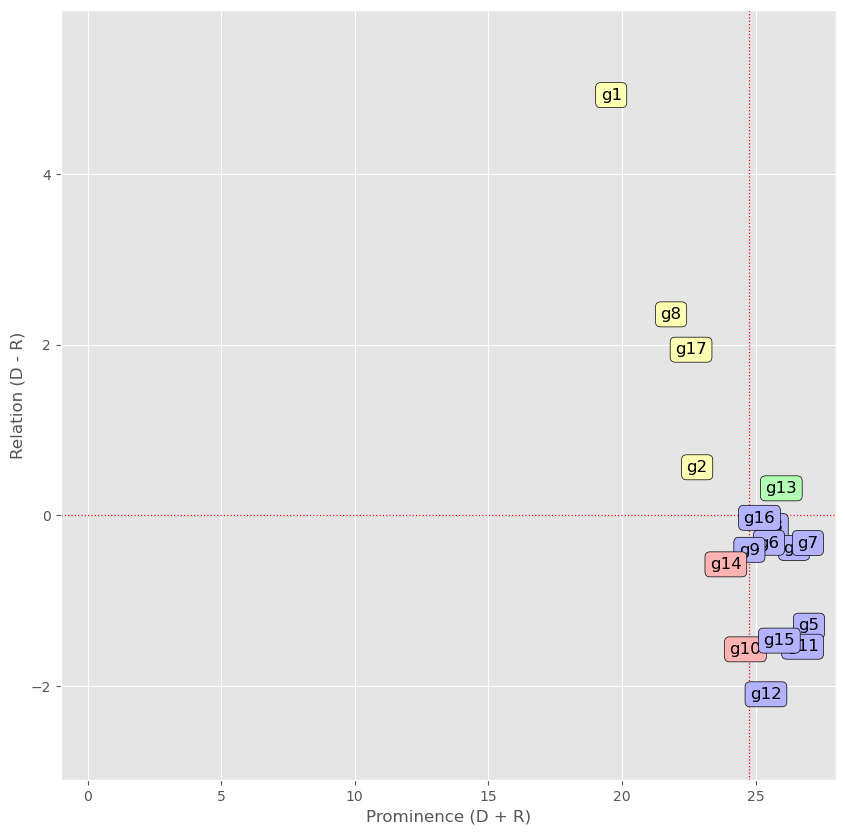

In [48]:
D_plus_R, D_minus_R, weights = dematel_method(pairwise_matrix)

In [50]:
pd.DataFrame({'D+R': D_plus_R, 'D-R': D_minus_R, 'Weights': weights})

,D+R,D-R,Weights
0,19.593025,4.920945,0.046571
1,22.810018,0.564089,0.054218
2,25.634554,-0.124430,0.060932
3,26.434121,-0.379294,0.062832
4,26.995689,-1.290314,0.064167
5,25.492317,-0.319087,0.060594
6,26.952838,-0.321994,0.064065
7,21.834682,2.354391,0.051900
8,24.764447,-0.401667,0.058863
9,24.616003,-1.567244,0.058511
